In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os, sys

sys.path.insert(0,'../scripts/tools_for_VAE/')
import tools_for_VAE
from tools_for_VAE import utils, plot

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import warnings
warnings.filterwarnings("ignore")

In [2]:
%run ../scripts/Images_generation/cosmos_generation.py

In [3]:
training_or_test = 'test'
data_dir = '../images/blended/' + training_or_test
root = 'galaxies_blended_20191001'

In [4]:
dfs = []
for i in range(1):
    dfs.append(pd.read_csv(os.path.join(data_dir, root+'_{}_data.csv'.format(i))))
df = dfs[0]
for df2 in dfs[1:]:
    df = df.append(df2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
nb_blended_gal                500 non-null int64
SNR                           500 non-null float64
SNR_peak                      500 non-null float64
redshift                      500 non-null float64
moment_sigma                  500 non-null float64
e1                            500 non-null float64
e2                            500 non-null float64
mag                           500 non-null float64
closest_x                     500 non-null float64
closest_y                     500 non-null float64
closest_redshift              500 non-null float64
closest_moment_sigma          500 non-null float64
closest_e1                    500 non-null float64
closest_e2                    500 non-null float64
closest_mag                   500 non-null float64
blendedness_total_lsst        381 non-null float64
blendedness_total_euclid      381 non-null float64
blendedness_closest_lsst      

In [6]:
df.head()

,nb_blended_gal,SNR,SNR_peak,redshift,moment_sigma,e1,e2,mag,closest_x,closest_y,closest_redshift,closest_moment_sigma,closest_e1,closest_e2,closest_mag,blendedness_total_lsst,blendedness_total_euclid,blendedness_closest_lsst,blendedness_closest_euclid
0,2,50.023899,0.088206,3.0140,1.624927,0.670954,0.576229,26.448832,1.102042,0.281749,0.7595,2.633502,0.063476,0.607384,27.158435,0.060756,0.035064,0.251659,0.075144
1,4,27.804683,0.038897,1.5041,2.071619,0.486584,0.313596,26.838525,1.172265,0.794479,0.8495,1.924292,-0.356023,0.572435,28.402564,0.063188,0.015131,0.145711,0.020004
2,2,13.022800,0.018277,1.7885,2.131886,-0.341106,0.747327,27.593085,0.297296,1.186906,1.1236,1.838381,-0.818363,0.318243,28.218694,0.136465,0.050082,0.238025,0.071445
3,3,316.179685,0.474991,0.3062,2.222467,-0.336952,0.123042,23.962460,-0.919617,0.222197,0.8071,1.598137,-0.574919,0.114939,27.551015,0.014795,0.006793,0.209180,0.026194
4,2,24.656635,0.035689,0.4666,2.025828,-0.477261,-0.316395,26.962793,-0.459920,0.573475,0.9052,1.971810,0.187837,0.957161,27.075081,0.277201,0.204845,0.410527,0.123613


In [7]:
df.describe()

,nb_blended_gal,SNR,SNR_peak,redshift,moment_sigma,e1,e2,mag,closest_x,closest_y,closest_redshift,closest_moment_sigma,closest_e1,closest_e2,closest_mag,blendedness_total_lsst,blendedness_total_euclid,blendedness_closest_lsst,blendedness_closest_euclid
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,381.000000,381.000000,381.000000,381.000000
mean,2.506000,104.049230,0.162024,0.960827,2.116877,0.012175,-0.017250,26.137787,-0.000869,-0.004262,1.126719,1.892633,0.051702,0.010136,27.325309,0.112040,0.069293,0.290512,0.117714
std,1.101085,213.668496,0.437401,0.721490,0.493821,0.438075,0.430723,1.375813,0.724773,0.751253,0.716740,0.311668,0.533345,0.466925,0.885236,0.109951,0.112030,0.256900,0.175593
min,1.000000,3.178277,0.004250,0.043700,1.525966,-0.934998,-0.944689,20.448996,-1.777382,-1.869422,0.040600,1.504908,-1.126538,-1.978568,23.160606,0.000667,0.000015,0.005395,0.000060
25%,2.000000,23.034497,0.034644,0.452000,1.771391,-0.321658,-0.328009,25.329808,-0.402018,-0.467137,0.642250,1.676766,-0.354270,-0.346207,26.938549,0.025203,0.004428,0.067612,0.007257
50%,3.000000,38.968495,0.056993,0.784650,1.999657,-0.016320,-0.011183,26.445229,0.000000,0.000000,0.958650,1.808375,0.035570,0.029232,27.437115,0.070977,0.018712,0.220436,0.040719
75%,3.000000,86.773360,0.116552,1.196875,2.289464,0.350399,0.270702,27.089175,0.382263,0.450741,1.413425,2.022240,0.434624,0.367356,27.846786,0.163072,0.085246,0.440849,0.155264
max,4.000000,2575.257526,7.716877,3.941200,4.967400,1.089026,0.966053,29.365147,1.855858,1.977519,3.995500,3.284524,3.661572,0.990508,29.668482,0.507400,0.594220,0.967459,0.862473


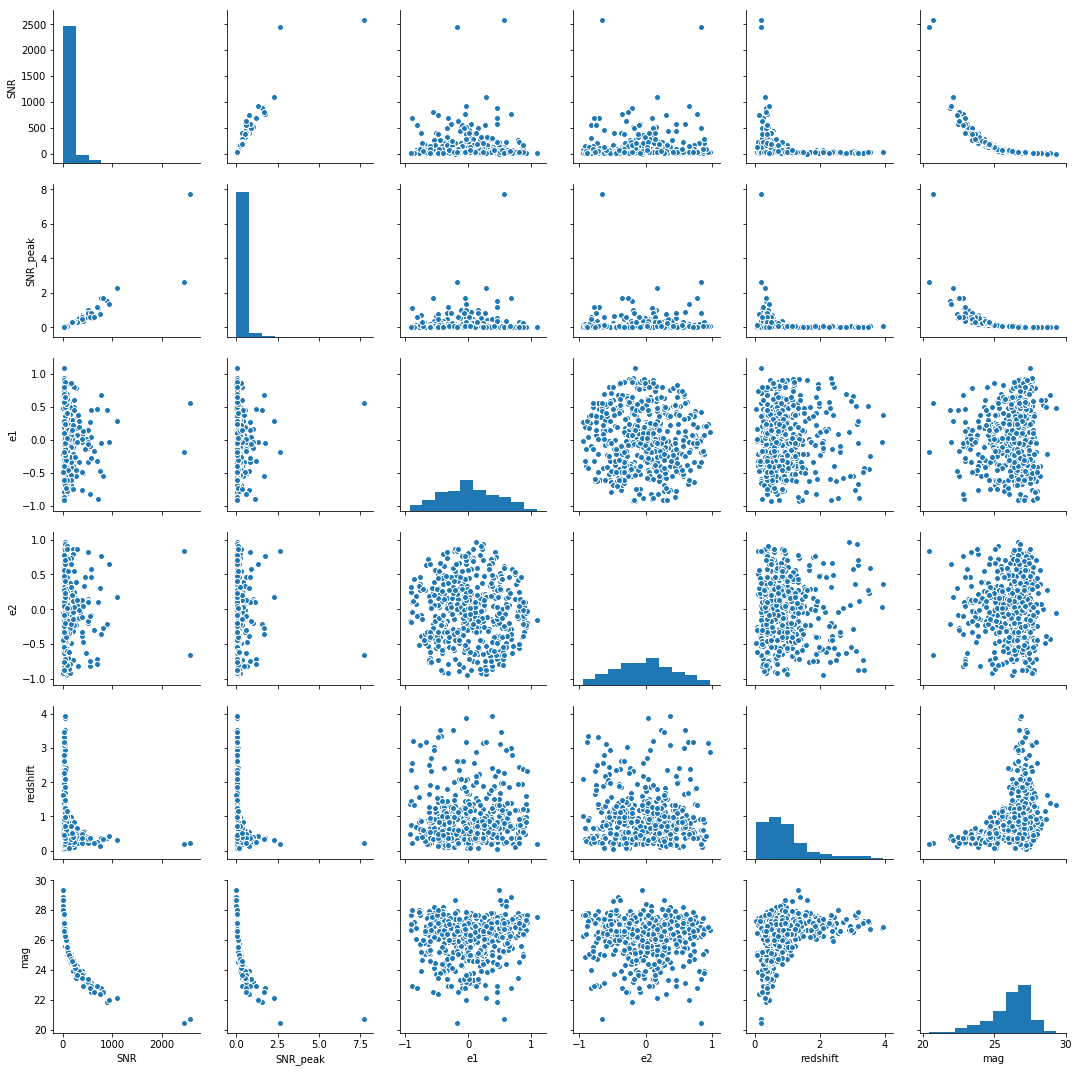

In [8]:
sns.pairplot(df, vars=['SNR', 'SNR_peak', 'e1', 'e2', 'redshift', 'mag'])

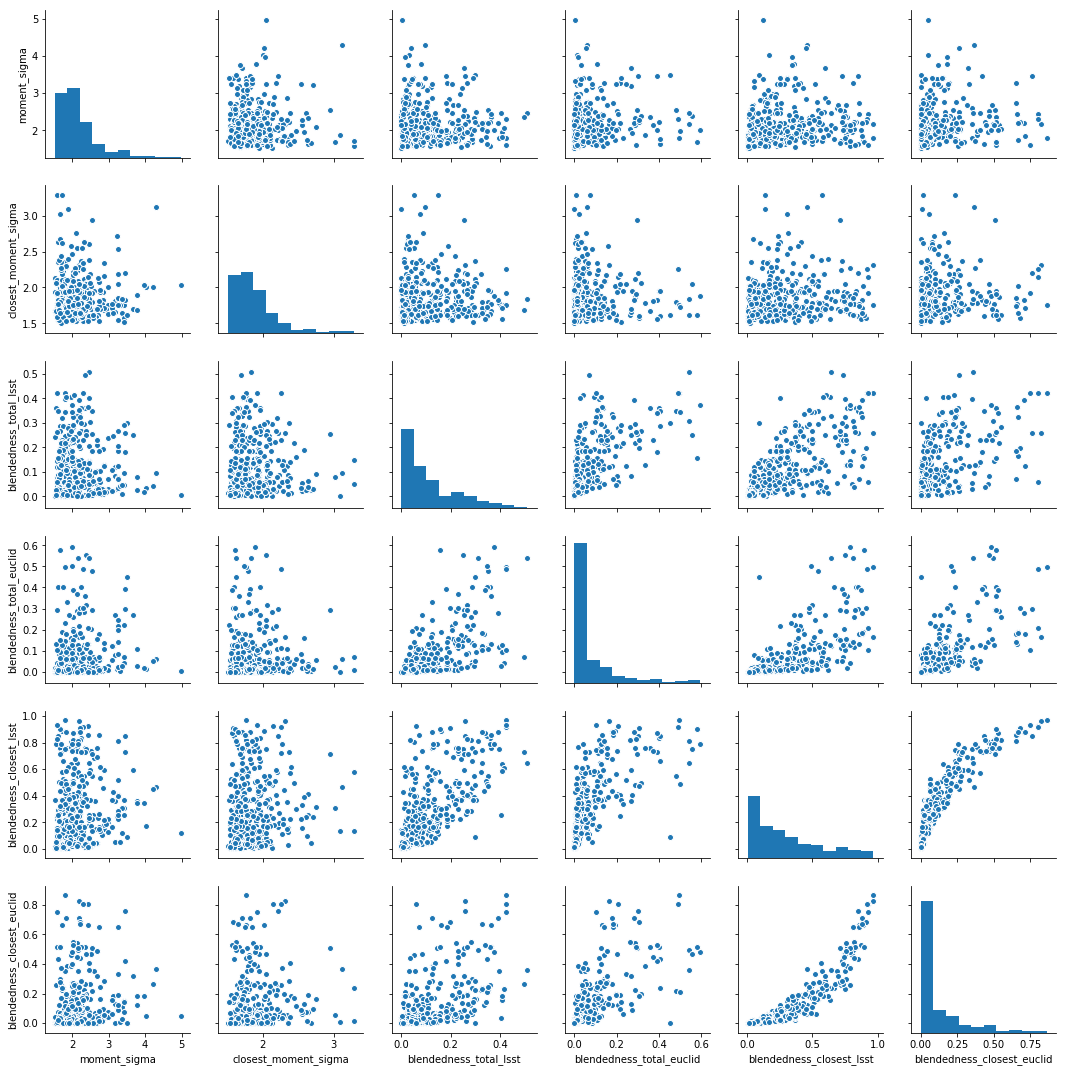

In [9]:
sns.pairplot(data=df.dropna(), vars=['moment_sigma', 'closest_moment_sigma', 'blendedness_total_lsst', 'blendedness_total_euclid', 'blendedness_closest_lsst', 'blendedness_closest_euclid'])

Text(0.5,0,'SNR')

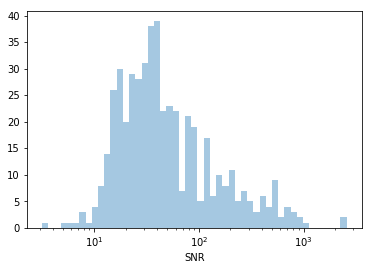

In [10]:
sns.distplot(df['SNR'], bins=np.geomspace(np.min(df['SNR']), np.max(df['SNR']), 50), kde=False)
plt.xscale('log')
plt.xlabel('SNR')

In [11]:
i = 0
galaxies = np.load(os.path.join(data_dir, root+'_{}_images.npy'.format(i)))
_ = utils.norm(galaxies[:,0], bands=range(10), channel_last=False)
_ = utils.norm(galaxies[:,1], bands=range(10), channel_last=False)
shifts = np.load(os.path.join(data_dir, root+'_{}_shifts.npy'.format(i)))

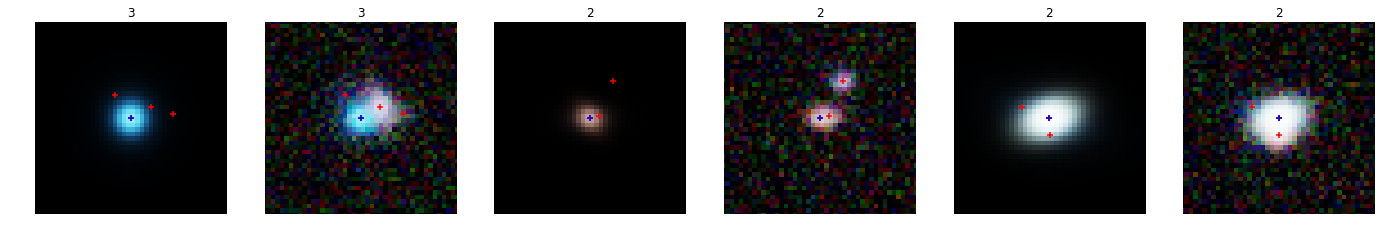

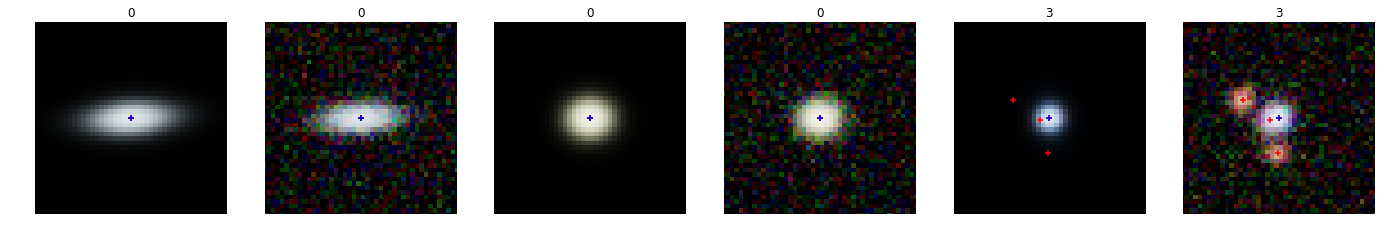

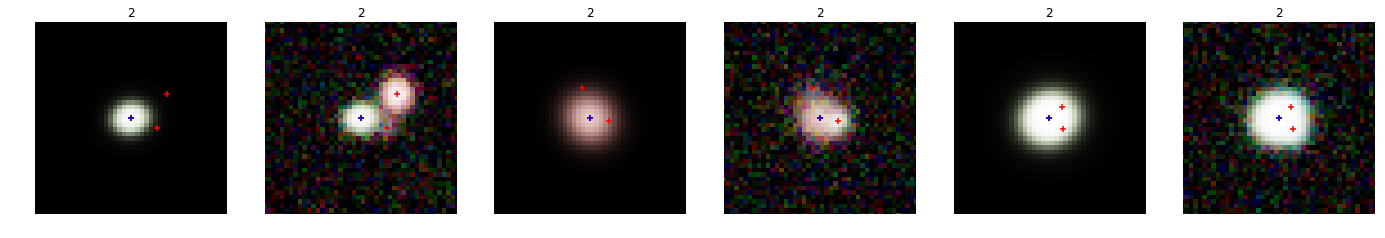

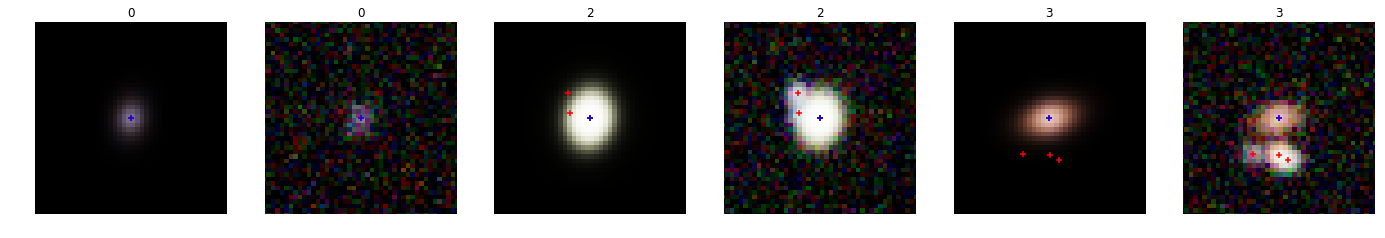

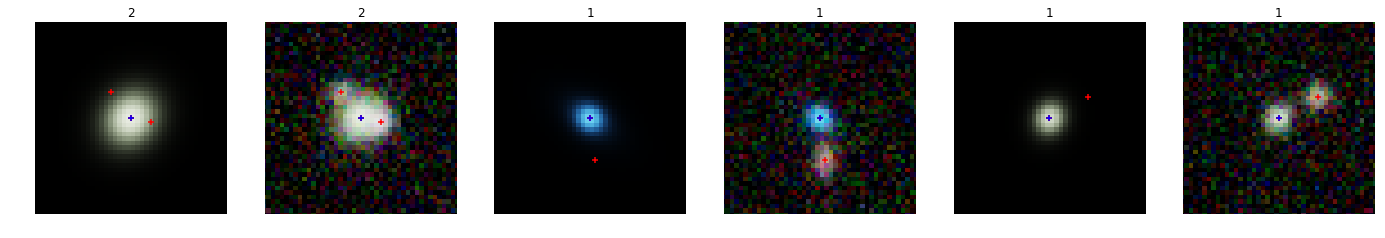

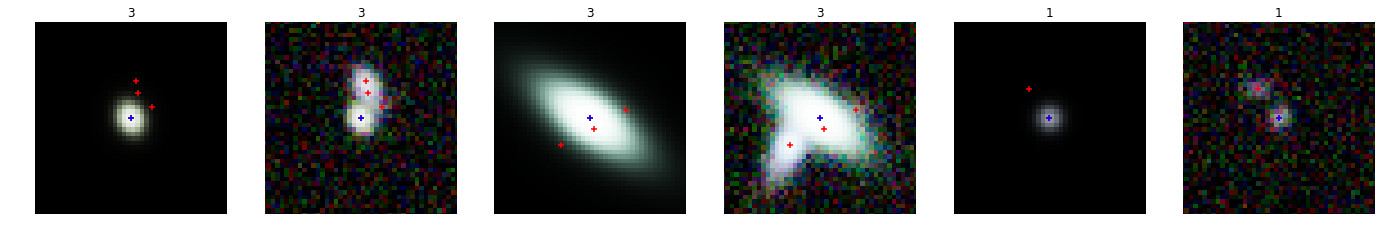

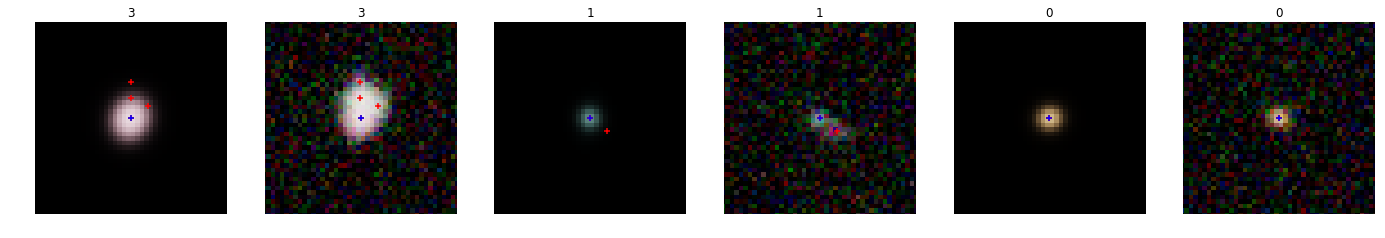

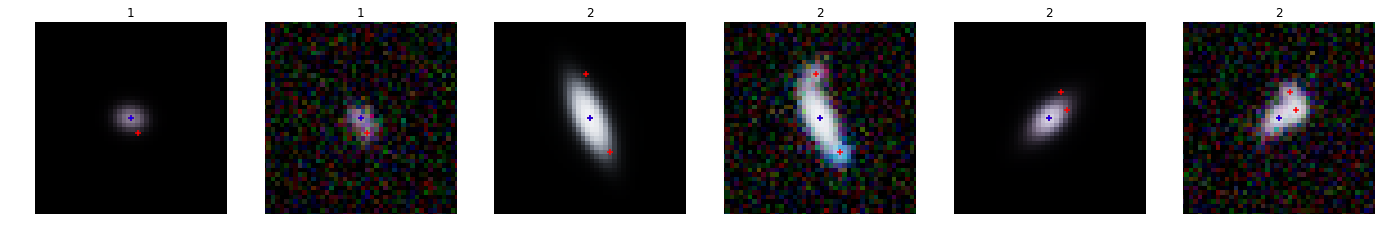

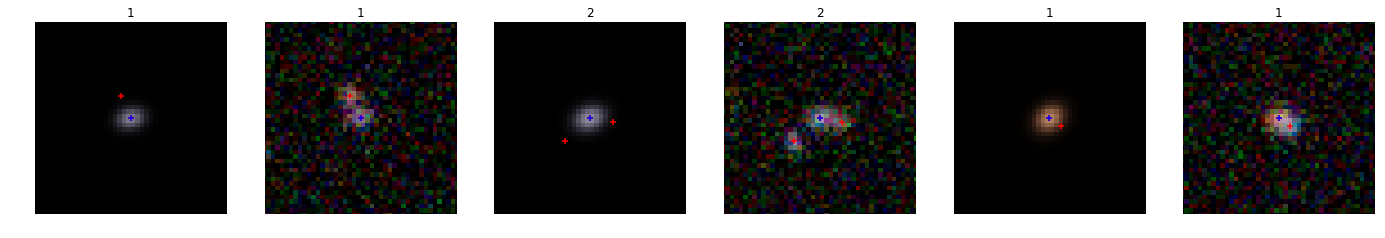

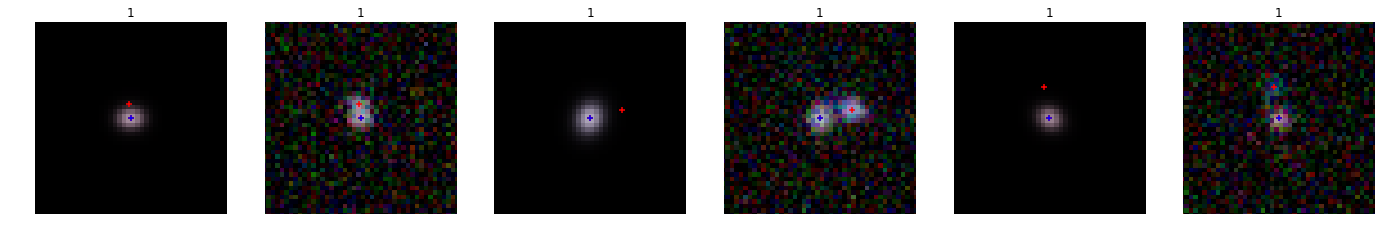

In [12]:
N = 10

for i in range(N):
    fig, axes = plt.subplots(1,6, figsize=(6*4,1*4))
    for j in range(3):
        idx = np.random.choice(range(len(galaxies)))
        for k in range(2):
            ax = axes[j*2+k]
            plot.plot_rgb(galaxies[idx][k], ax=ax, shifts=shifts[idx]/pixel_scale_lsst)
            ax.set_title(str(int(np.sum(shifts[idx]!=0.)/2)))

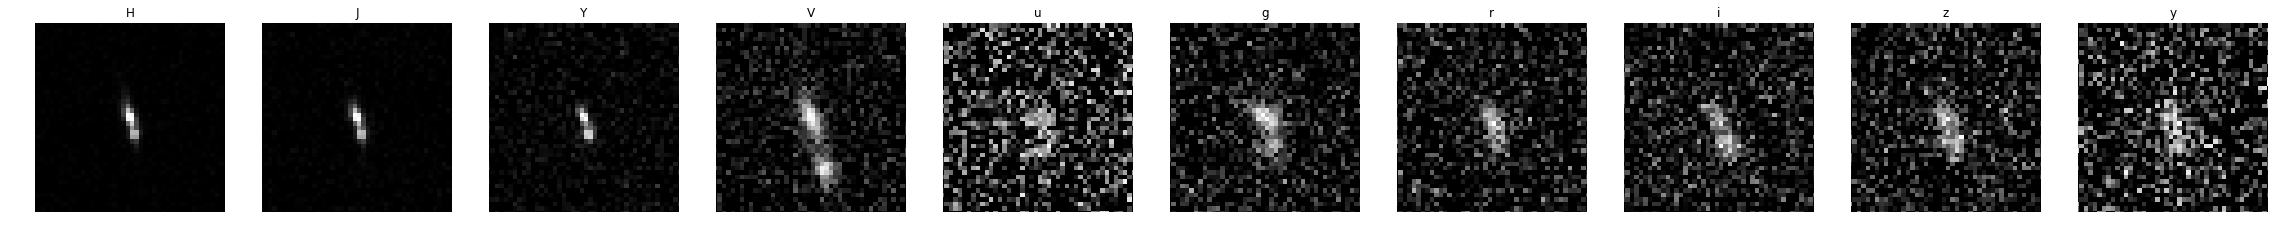

In [13]:
plot.plot_all_bands(galaxies[2,1], band_first=True, cmap=mpl.cm.gray)

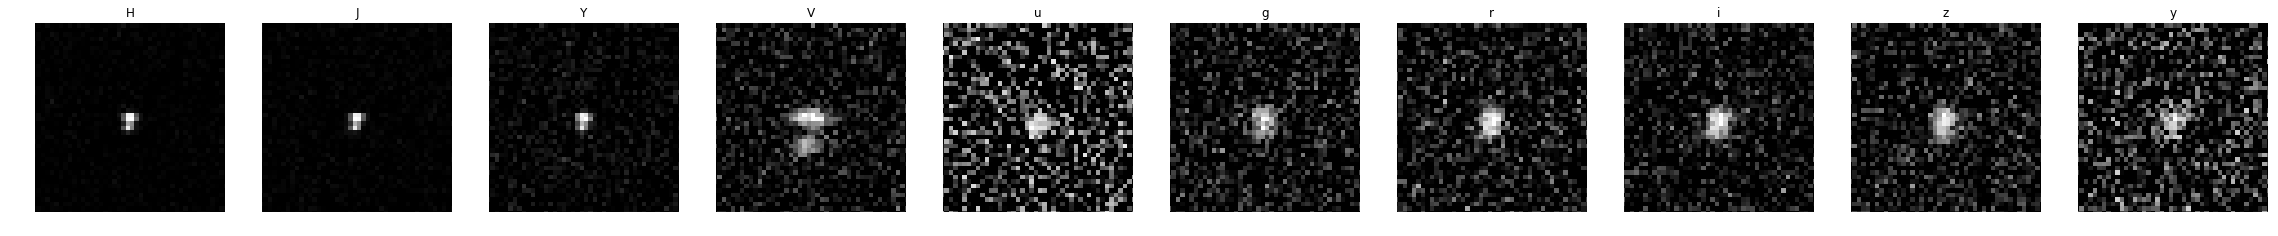

In [14]:
plot.plot_all_bands(galaxies[24,1], band_first=True, cmap=mpl.cm.gray)